In [1]:
import gzip
from Bio import SeqIO, SeqRecord
from Bio.SeqUtils import CodonAdaptationIndex
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import re
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from datetime import datetime
import random

human_proteome_path = "../../datasets/raw/Homo_sapiens.GRCh38.cds.all.fa.gz"
# base_path = "../../datasets/raw/spikenuc0415_clean_n_X.fasta"
# base_path = "../../datasets/raw/spike_nuc_clean_3813"
base_path = "../../datasets/raw/spike_nuc_X.fasta.gz"
de_novo_path = "../../sample_outputs/2023_06_25__20_01_21/rnaformer_base__generated__de_novo.fasta"
paths = []

pattern = re.compile("[^AatTgGcC*?]")

for i in range(0, 15):
    path = base_path.replace("X", str(i+1))
    paths.append(path)

def is_gene_valid(seq):
    if len(seq) % 3 != 0:
        return False
    if re.search(pattern, str(seq)):
        return False
    
    return True

Length analysis

In [3]:
lens = []
outliers = 0
for path in paths:
    with open(path, "r") as handle:
        for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
            lens.append(len(seq_record.seq))

            if len(seq_record.seq) > 3796 or len(seq_record.seq) < 3796:
                # print(len(seq_record.seq))
                outliers += 1

            # if len(lens) > 100:
            #     break

print(outliers)
print(len(lens))
# print(max(set(lens), key=lens.count))
# print(lens.count(max(set(lens), key=lens.count)))
print(st.t.interval(confidence=0.95, df=len(lens)-1, loc=np.mean(lens), scale=st.sem(lens)) )
plt.hist(lens, bins=18, range=(3804, 3821))
plt.show() 



750709it [00:09, 82021.34it/s]
725577it [00:08, 82492.40it/s]
628270it [00:07, 84422.42it/s]
614948it [00:07, 82072.83it/s]
101640it [00:01, 79906.52it/s]


KeyboardInterrupt: 

In [21]:
lens = {}
for path in paths:
    with open(path, "r") as handle:
        for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
            if len(seq_record.seq) in lens:
                lens[len(seq_record.seq)] += 1
            else:
                lens[len(seq_record.seq)] = 0


            # if len(lens) > 100:
            #     break

            # if len(seq_record.seq) > 3796 or len(seq_record.seq) < 3796:
            #     # print(len(seq_record.seq))
            #     outliers += 1

lens_pd = pd.DataFrame.from_dict(lens, orient='index')
lens_pd.columns = ["num"]
lens_pd.sort_values(by = ['num'],inplace=True, ascending=False)
print(lens_pd)
# print(outliers)
# print(len(lens))
# # print(max(set(lens), key=lens.count))
# # print(lens.count(max(set(lens), key=lens.count)))
# print(st.t.interval(confidence=0.95, df=len(lens)-1, loc=np.mean(lens), scale=st.sem(lens)) )
# plt.hist(lens, bins=18, range=(3804, 3821))
# plt.show() 


750709it [00:08, 88710.62it/s]
725577it [00:08, 87661.83it/s]
628270it [00:07, 88038.72it/s]
614948it [00:07, 87763.17it/s]
732090it [00:08, 86320.61it/s]
643698it [00:07, 85661.33it/s]
609836it [00:07, 84996.97it/s]
504512it [00:05, 84713.90it/s]
542315it [00:06, 85238.39it/s]
638398it [00:07, 84652.94it/s]
612798it [00:07, 82839.12it/s]
680992it [00:07, 88491.35it/s]
688620it [00:07, 87783.79it/s]
707153it [00:08, 85762.17it/s]
689719it [00:08, 85438.88it/s]

          num
3813  3640315
3816  2986779
3807  1650426
3822  1054342
3804   153115
...       ...
1476        0
1896        0
1938        0
1870        0
1487        0

[2681 rows x 1 columns]


In [17]:
lens = []
outliers = 0
for path in paths:
    with open(path, "r") as handle:
        for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
            if len(seq_record.seq) == 3813:
                # print(len(seq_record.seq))
                lens.append(seq_record.seq)

            # if len(lens) > 100:
            #     break

print(outliers)
print(len(lens))


750709it [00:09, 76270.30it/s]
725577it [00:09, 74603.86it/s]
628270it [00:07, 80311.14it/s]
614948it [00:07, 79168.51it/s]
732090it [00:09, 80522.85it/s]
643698it [00:08, 76909.45it/s]
609836it [00:07, 81396.54it/s]
504512it [00:06, 76660.21it/s]
542315it [00:08, 66792.45it/s]
638398it [00:08, 74182.73it/s]
612798it [00:08, 72290.53it/s]
680992it [00:10, 64250.35it/s]
688620it [00:08, 77754.26it/s]
707153it [00:08, 79436.43it/s]
689719it [00:08, 80004.84it/s]

0
3640316


In [18]:
print(len(lens))
print(len(set(lens)))

3640316
208236


Codon bias analysis

In [2]:
human_proteome = SeqIO.parse(gzip.open(human_proteome_path, "rt"), "fasta")
human_valid_proteome = []
for seq_record in tqdm(human_proteome):
    if is_gene_valid(seq_record.seq):
        human_valid_proteome.append(seq_record)
        # cai.cai_for_gene(str(seq_record.seq))

human_bias = CodonAdaptationIndex(human_valid_proteome)
print(human_bias)
# print(cai.print_index())




121766it [00:02, 55356.71it/s]


AAA	0.804
AAC	1.000
AAG	1.000
AAT	0.946
ACA	0.859
ACC	1.000
ACG	0.317
ACT	0.741
AGA	1.000
AGC	1.000
AGG	0.944
AGT	0.668
ATA	0.384
ATC	1.000
ATG	1.000
ATT	0.822
CAA	0.372
CAC	1.000
CAG	1.000
CAT	0.772
CCA	0.921
CCC	1.000
CCG	0.340
CCT	0.962
CGA	0.513
CGC	0.762
CGG	0.895
CGT	0.372
CTA	0.191
CTC	0.491
CTG	1.000
CTT	0.367
GAA	0.790
GAC	1.000
GAG	1.000
GAT	0.935
GCA	0.623
GCC	1.000
GCG	0.253
GCT	0.706
GGA	0.819
GGC	1.000
GGG	0.761
GGT	0.527
GTA	0.277
GTC	0.520
GTG	1.000
GTT	0.426
TAA	0.516
TAC	1.000
TAG	0.401
TAT	0.857
TCA	0.678
TCC	0.906
TCG	0.220
TCT	0.818
TGA	1.000
TGC	1.000
TGG	1.000
TGT	0.889
TTA	0.213
TTC	1.000
TTG	0.349
TTT	0.913



In [4]:
de_novo_seqs_file = SeqIO.parse(de_novo_path, "fasta")
de_novo_biases = []
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq):
        # triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]
        # print(triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA"))
        # print(triplets.count("ATG"))
        de_novo_biases.append(CodonAdaptationIndex([seq_record.seq]))
        # cai.cai_for_gene(str(seq_record.seq))

# de_novo_bias = CodonAdaptationIndex(de_novo_seqs)
print(de_novo_biases)

20it [00:00, 113.76it/s]

186
27
203
43
202
26
193
26
197
34
210
26
213
30
188
40
193
30
210
32
177
29
210
28
205
31
193
30
174
28
182
29
202
32
187
21
188
40
203
23
[{'AAA': 1.0, 'AAC': 0.875, 'AAG': 0.35294117647058826, 'AAT': 1.0, 'ACA': 1.0, 'ACC': 0.1875, 'ACG': 0.1736111111111111, 'ACT': 0.4791666666666667, 'AGA': 1.0, 'AGC': 0.45555555555555555, 'AGG': 0.5692307692307692, 'AGT': 0.45555555555555555, 'ATA': 0.9158878504672897, 'ATC': 0.18691588785046728, 'ATG': 1.0, 'ATT': 1.0, 'CAA': 1.0, 'CAC': 0.22972972972972974, 'CAG': 0.3277310924369748, 'CAT': 1.0, 'CCA': 1.0, 'CCC': 0.09574468085106383, 'CCG': 0.010638297872340425, 'CCT': 0.2765957446808511, 'CGA': 0.13846153846153847, 'CGC': 0.03076923076923077, 'CGG': 0.046153846153846156, 'CGT': 0.2153846153846154, 'CTA': 0.17647058823529413, 'CTC': 0.5935828877005348, 'CTG': 0.16042780748663102, 'CTT': 1.0, 'GAA': 0.990990990990991, 'GAC': 0.4647887323943662, 'GAG': 1.0, 'GAT': 1.0, 'GCA': 0.7083333333333334, 'GCC': 0.20833333333333334, 'GCG': 0.10416666666666

In [5]:
covid_biases = []

for path in paths:
    all = []
    i = 0
    with gzip.open(path, "rt") as handle:
        for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
            all.append(seq_record)

        for seq in tqdm(random.sample(all, 10000)):
            if is_gene_valid(seq.seq):
                # triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]
                # print(triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA"))
                # print(triplets.count("ATG"))
                bias = CodonAdaptationIndex([seq])
                bias["date"] = seq.description.split("|")[2]
                try:
                    datetime.strptime(bias["date"], "%Y-%m-%d")
                    covid_biases.append(bias)
                    i+=1
                except ValueError:
                    # print(bias["date"])
                    continue
        break
# for path in paths:
#     i = 0
#     with open(path, "r") as handle:
#         for seq_record in tqdm(SeqIO.parse(path, "fasta")):
#             if is_gene_valid(seq_record.seq):
#                 bias = CodonAdaptationIndex([seq_record])
#                 bias["date"] = seq_record.description.split("|")[2]
#                 try:
#                     datetime.strptime(bias["date"], "%Y-%m-%d")
#                     covid_biases.append(bias)
#                     i+=1
#                 except ValueError:
#                     # print(bias["date"])
#                     continue
#             if i > 10000:
#                 break
    

# print(covid_biases[0].items())

1000000it [00:21, 45970.46it/s]
  1%|          | 106/10000 [00:00<00:18, 531.44it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


  2%|▏         | 213/10000 [00:00<00:19, 492.49it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


  3%|▎         | 325/10000 [00:00<00:18, 525.80it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


  4%|▍         | 435/10000 [00:00<00:18, 506.56it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


  5%|▌         | 536/10000 [00:01<00:19, 482.15it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


  6%|▋         | 636/10000 [00:01<00:19, 487.29it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1


  7%|▋         | 732/10000 [00:01<00:20, 461.11it/s]

14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


  8%|▊         | 825/10000 [00:01<00:20, 443.95it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


  9%|▉         | 924/10000 [00:01<00:19, 464.70it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 11%|█         | 1075/10000 [00:02<00:19, 461.50it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 12%|█▏        | 1171/10000 [00:02<00:19, 463.18it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 13%|█▎        | 1265/10000 [00:02<00:19, 439.10it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 14%|█▎        | 1360/10000 [00:02<00:19, 450.99it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 15%|█▍        | 1460/10000 [00:03<00:18, 470.60it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 16%|█▌        | 1562/10000 [00:03<00:17, 477.78it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 17%|█▋        | 1660/10000 [00:03<00:17, 478.83it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 18%|█▊        | 1756/10000 [00:03<00:18, 455.95it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 19%|█▊        | 1860/10000 [00:03<00:17, 459.07it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 20%|█▉        | 1967/10000 [00:04<00:16, 489.39it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 21%|██        | 2074/10000 [00:04<00:16, 479.08it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 22%|██▏       | 2176/10000 [00:04<00:16, 483.20it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 23%|██▎       | 2323/10000 [00:04<00:16, 478.06it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 24%|██▍       | 2419/10000 [00:05<00:16, 451.82it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 25%|██▌       | 2518/10000 [00:05<00:15, 471.86it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 26%|██▋       | 2626/10000 [00:05<00:14, 504.96it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 27%|██▋       | 2727/10000 [00:05<00:15, 462.40it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 28%|██▊       | 2823/10000 [00:05<00:15, 465.43it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 29%|██▉       | 2916/10000 [00:06<00:15, 451.49it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 30%|███       | 3007/10000 [00:06<00:15, 445.73it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 31%|███       | 3102/10000 [00:06<00:15, 457.10it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 32%|███▏      | 3190/10000 [00:07<00:34, 197.97it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 33%|███▎      | 3286/10000 [00:07<00:23, 285.27it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 34%|███▍      | 3426/10000 [00:07<00:17, 371.76it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 35%|███▌      | 3522/10000 [00:08<00:15, 417.90it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 36%|███▌      | 3613/10000 [00:08<00:14, 426.68it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 37%|███▋      | 3749/10000 [00:08<00:14, 438.35it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 38%|███▊      | 3840/10000 [00:08<00:13, 441.54it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 39%|███▉      | 3935/10000 [00:09<00:13, 446.50it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 40%|████      | 4025/10000 [00:09<00:13, 445.09it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 42%|████▏     | 4169/10000 [00:09<00:12, 466.97it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 43%|████▎     | 4262/10000 [00:09<00:12, 447.93it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1


 44%|████▎     | 4352/10000 [00:09<00:13, 432.63it/s]

14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 44%|████▍     | 4440/10000 [00:10<00:12, 428.77it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 46%|████▌     | 4581/10000 [00:10<00:12, 444.95it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 47%|████▋     | 4671/10000 [00:10<00:12, 440.90it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 48%|████▊     | 4772/10000 [00:10<00:10, 476.02it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 49%|████▊     | 4874/10000 [00:11<00:10, 478.73it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 50%|████▉     | 4971/10000 [00:11<00:10, 461.48it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 51%|█████     | 5069/10000 [00:11<00:10, 471.56it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 52%|█████▏    | 5165/10000 [00:11<00:10, 464.58it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 53%|█████▎    | 5258/10000 [00:11<00:10, 441.22it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 53%|█████▎    | 5349/10000 [00:12<00:10, 429.26it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 54%|█████▍    | 5437/10000 [00:12<00:10, 431.26it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 56%|█████▌    | 5583/10000 [00:12<00:09, 458.90it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 57%|█████▋    | 5683/10000 [00:12<00:09, 448.92it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 58%|█████▊    | 5773/10000 [00:13<00:09, 426.66it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 59%|█████▊    | 5863/10000 [00:13<00:09, 431.57it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 60%|█████▉    | 5952/10000 [00:13<00:09, 423.03it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 60%|██████    | 6050/10000 [00:13<00:08, 456.37it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 62%|██████▏   | 6201/10000 [00:14<00:07, 478.79it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 63%|██████▎   | 6298/10000 [00:14<00:08, 458.70it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 64%|██████▍   | 6390/10000 [00:14<00:08, 442.01it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 65%|██████▍   | 6479/10000 [00:14<00:08, 433.86it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 66%|██████▌   | 6570/10000 [00:14<00:07, 439.13it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 67%|██████▋   | 6663/10000 [00:15<00:07, 437.63it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 68%|██████▊   | 6757/10000 [00:15<00:07, 449.36it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 69%|██████▉   | 6901/10000 [00:15<00:06, 458.27it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 70%|██████▉   | 6999/10000 [00:15<00:06, 459.31it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 71%|███████   | 7092/10000 [00:16<00:06, 445.84it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 72%|███████▏  | 7184/10000 [00:16<00:06, 450.86it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 73%|███████▎  | 7277/10000 [00:16<00:06, 449.04it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 74%|███████▍  | 7417/10000 [00:16<00:05, 453.07it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 75%|███████▌  | 7512/10000 [00:17<00:05, 452.39it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 76%|███████▌  | 7612/10000 [00:17<00:05, 444.45it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1


 77%|███████▋  | 7701/10000 [00:17<00:05, 431.81it/s]

14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 78%|███████▊  | 7842/10000 [00:17<00:04, 438.53it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 79%|███████▉  | 7930/10000 [00:17<00:04, 433.46it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1


 80%|████████  | 8020/10000 [00:18<00:04, 441.12it/s]

14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 81%|████████  | 8108/10000 [00:18<00:04, 418.78it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 83%|████████▎ | 8267/10000 [00:18<00:03, 490.91it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 84%|████████▎ | 8366/10000 [00:18<00:03, 473.62it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 85%|████████▍ | 8462/10000 [00:19<00:03, 455.62it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 86%|████████▌ | 8560/10000 [00:19<00:03, 466.40it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 87%|████████▋ | 8656/10000 [00:19<00:02, 456.02it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 87%|████████▋ | 8747/10000 [00:19<00:02, 420.80it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 88%|████████▊ | 8838/10000 [00:20<00:02, 428.90it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 89%|████████▉ | 8926/10000 [00:20<00:02, 424.04it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 91%|█████████ | 9068/10000 [00:20<00:02, 447.90it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 92%|█████████▏| 9167/10000 [00:20<00:01, 471.90it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 93%|█████████▎| 9270/10000 [00:20<00:01, 489.53it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 94%|█████████▎| 9367/10000 [00:21<00:01, 459.63it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 95%|█████████▍| 9459/10000 [00:21<00:01, 442.01it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 95%|█████████▌| 9548/10000 [00:21<00:01, 423.73it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 96%|█████████▋| 9634/10000 [00:21<00:00, 422.35it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 98%|█████████▊| 9774/10000 [00:22<00:00, 448.67it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


 99%|█████████▊| 9867/10000 [00:22<00:00, 438.29it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


100%|█████████▉| 9955/10000 [00:22<00:00, 422.02it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


100%|██████████| 10000/10000 [00:22<00:00, 442.13it/s]

1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14
1
14


         pc0       pc1  date     type
15 -0.024320  0.987958  1000  de novo
16 -0.064120  1.198604  1000  de novo
17 -0.029419  1.046869  1000  de novo
18 -0.010630  1.209069  1000  de novo
19 -0.042465  1.054488  1000  de novo


/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'PCA analysis of CAI')]

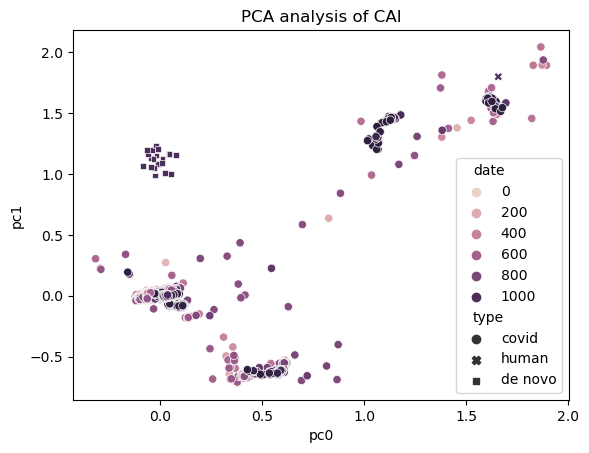

In [16]:
def days(d):
    return d.days

all_biases = covid_biases + de_novo_biases + [human_bias]
all_biases_pd = pd.DataFrame(all_biases)
covid_biases_pd = pd.DataFrame(covid_biases)
de_novo_biases_pd = pd.DataFrame(de_novo_biases)
human_bias_pd = pd.DataFrame([human_bias])
# print(all_biases_pd.head())
# print(all_biases_pd.tail())

covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"]))
dates = covid_biases_pd["date"].apply(days)
covid_biases_pd.drop(columns=["date"], inplace=True)

pca = PCA(n_components=2)

pca.fit(all_biases_pd.drop(columns=["date"], inplace=False))

covid_biases_pd = pca.transform(covid_biases_pd)
human_bias_pd = pca.transform(human_bias_pd)
de_novo_biases_pd = pca.transform(de_novo_biases_pd)

covid_biases_pd = pd.DataFrame(covid_biases_pd, columns=["pc0", "pc1"])
covid_biases_pd["date"] = dates
covid_biases_pd["type"] = "covid"

human_bias_pd = pd.DataFrame(human_bias_pd, columns=["pc0", "pc1"])
human_bias_pd["date"] = 1000
human_bias_pd["type"] = "human"

de_novo_biases_pd = pd.DataFrame(de_novo_biases_pd, columns=["pc0", "pc1"])
de_novo_biases_pd["date"] = 1000
de_novo_biases_pd["type"] = "de novo"

all_biases_pd = pd.concat([covid_biases_pd, human_bias_pd, de_novo_biases_pd])
print(all_biases_pd.tail())

sns.scatterplot(all_biases_pd["pc0"], all_biases_pd["pc1"], hue=all_biases_pd["date"], style=all_biases_pd["type"]).set(title='PCA analysis of CAI')

# sns.kdeplot(
#     data=all_biases_pd, x="pc0", y="1", hue="pc1", fill=True,
# )



In [6]:
print(pca.explained_variance_ratio_)

[0.2739754  0.22894138]


    distance
0  11.764794
1  11.792772
2  11.757393
3  11.797994
4  11.722265
    distance  date      type
0  11.764794   469  wildtype
1  11.792772   385  wildtype
2  11.757393   388  wildtype
3  11.797994   364  wildtype
4  11.722265   413  wildtype
cannot drop
    distance
0  11.695141
1  11.504087
2  11.299463
3  11.219300
4  11.724452
    distance     type  date
0  11.695141  de novo  1150
1  11.504087  de novo  1150
2  11.299463  de novo  1150
3  11.219300  de novo  1150
4  11.724452  de novo  1150
   index   distance  date      type
0      0  11.764794   469  wildtype
1      1  11.792772   385  wildtype
2      2  11.757393   388  wildtype
3      3  11.797994   364  wildtype
4      4  11.722265   413  wildtype


/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


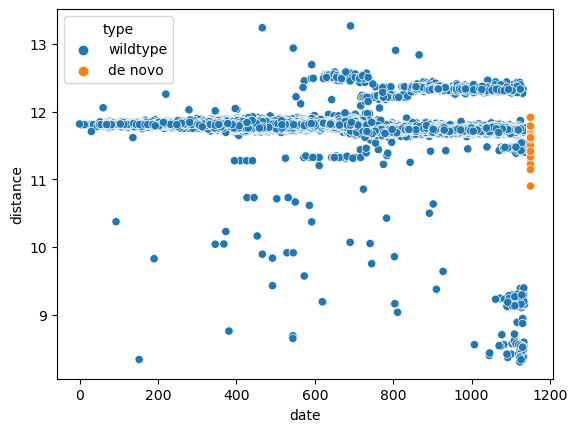

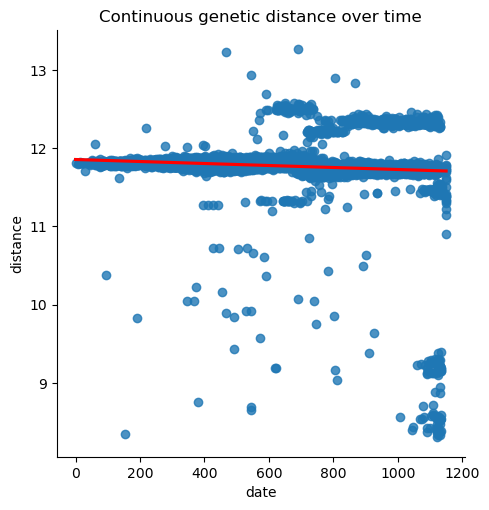

In [34]:
def batch_genetic_distance(cai_1, cai_2):
    cai_1_pd = pd.DataFrame(cai_1)
    try:
        cai_1_pd = cai_1_pd.drop(columns=["date"])
    except:
        print("cannot drop")
        pass
    cai_2_pd = pd.DataFrame([cai_2])
    # set all values <1 to 0
    # print(cai_1_pd.head())
    # for column in cai_1_pd.columns:
    #     cai_1_pd[column].loc[cai_1_pd[column] < 1] = 0
    # # print(cai_1_pd.head())
    # for column in cai_2_pd.columns:
    #     cai_2_pd[column].loc[cai_2_pd[column] < 1] = 0

    return abs(cai_1_pd - cai_2_pd.values.squeeze()).sum(axis=1) / 2

def days(d):
    return d.days

covid_biases_pd = pd.DataFrame(covid_biases)
covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"])).apply(days)

genetic_distances = batch_genetic_distance(covid_biases, human_bias)
genetic_distances = pd.DataFrame(genetic_distances, columns=["distance"])
print(genetic_distances.head())
genetic_distances = pd.concat([genetic_distances, covid_biases_pd["date"]], axis=1)
genetic_distances["type"] = "wildtype"

print(genetic_distances.head())

de_novo_distances = batch_genetic_distance(de_novo_biases, human_bias)
de_novo_distances = pd.DataFrame(de_novo_distances, columns=["distance"])
print(de_novo_distances.head())
de_novo_distances["type"] = "de novo"
de_novo_distances["date"] = 1150

print(de_novo_distances.head())

genetic_distances = pd.concat([genetic_distances, de_novo_distances])
genetic_distances = genetic_distances.reset_index()
print(genetic_distances.head())

sns.scatterplot(genetic_distances["date"], genetic_distances["distance"], hue=genetic_distances["type"])
sns.lmplot(
    data=genetic_distances, x="date", y="distance", line_kws=dict(color="r")
).set(title='Continuous genetic distance over time')

             pc0       pc1  date   type
140114  0.032881 -0.017880  1042  covid
140115  0.036412 -0.014474  1049  covid
140116 -0.050086  0.043462   591  covid
140117  0.038677 -0.012975  1090  covid
0       2.104709  1.343977    -1  human


/tmp/ipykernel_9016/2818809324.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_biases_pd_early["type"] = "early covid"
/tmp/ipykernel_9016/2818809324.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_biases_pd_early["type"] = "late covid"


ValueError: Contour levels must be increasing

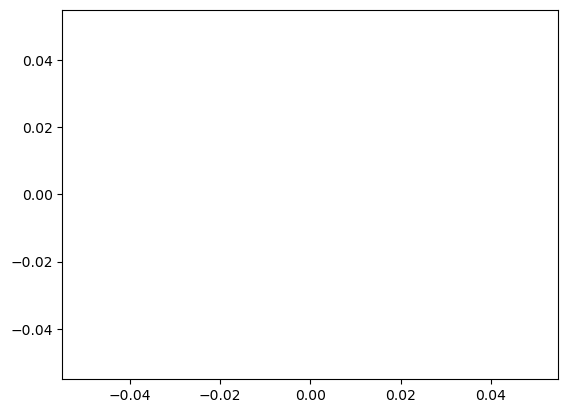

In [178]:
def days(d):
    return d.days

all_biases = covid_biases + [human_bias]
all_biases_pd = pd.DataFrame(all_biases)
covid_biases_pd = pd.DataFrame(covid_biases)
human_bias_pd = pd.DataFrame([human_bias])
# print(all_biases_pd.head())
# print(all_biases_pd.tail())

covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"]))
dates = covid_biases_pd["date"].apply(days)
covid_biases_pd.drop(columns=["date"], inplace=True)

pca = PCA(n_components=2)

pca.fit(all_biases_pd.drop(columns=["date"], inplace=False))

covid_biases_pd = pca.transform(covid_biases_pd)
human_bias_pd = pca.transform(human_bias_pd)

covid_biases_pd = pd.DataFrame(covid_biases_pd, columns=["pc0", "pc1"])
covid_biases_pd["date"] = dates
covid_biases_pd["type"] = "covid"

human_bias_pd = pd.DataFrame(human_bias_pd, columns=["pc0", "pc1"])
human_bias_pd["date"] = -1
human_bias_pd["type"] = "human"

all_biases_pd = pd.concat([covid_biases_pd, human_bias_pd])
print(all_biases_pd.tail())

all_biases_pd.reset_index(inplace=True)
all_biases_pd_early = all_biases_pd.loc[all_biases_pd["date"] < 100]
all_biases_pd_early["type"] = "early covid"
all_biases_pd_late = all_biases_pd.loc[all_biases_pd["date"] > 1100]
all_biases_pd_early["type"] = "late covid"

all_biases_pd = pd.concat([all_biases_pd_early, all_biases_pd_early])
all_biases_pd.reset_index(inplace=True)

sns.kdeplot(
    data=all_biases_pd, x="pc0", y="pc1", hue="type", common_norm=False
)

/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='pc0', ylabel='pc1'>

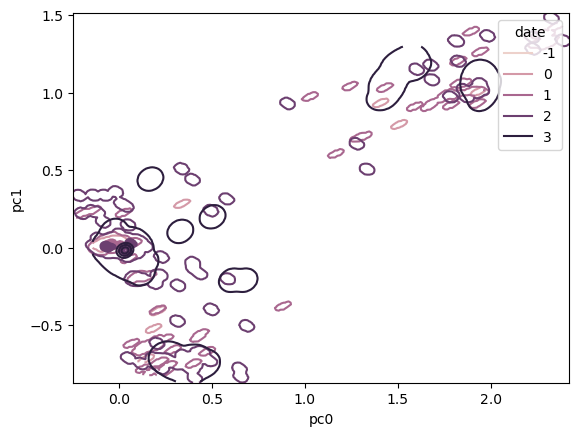

In [140]:
# all_biases_pd.reset_index(inplace=True)

# all_biases_pd["date"] = all_biases_pd["date"] // 100
# print(all_biases_pd.head())
# sns.displot(
#     data=all_biases_pd, x="pc0", y="pc1", hue="date",
# )

# sns.histplot(
#     data=all_biases_pd, x="pc0", y="pc1", hue="date",bins=50, palette=sns.color_palette("tab10")[0:7]
# )
# sns.histplot(
#     data=all_biases_pd, x="pc0", y="pc1", hue="date",bins=50
# )

             pc0       pc1  date   type
140004  0.022923 -0.030832   914  covid
140005  0.034210 -0.037468  1080  covid
140006  0.022923 -0.030832  1029  covid
140007  0.253265 -0.780313  1089  covid
0       2.408112  0.982866    -1  human


[Text(0.5, 1.0, 'Histogram of timestamps')]

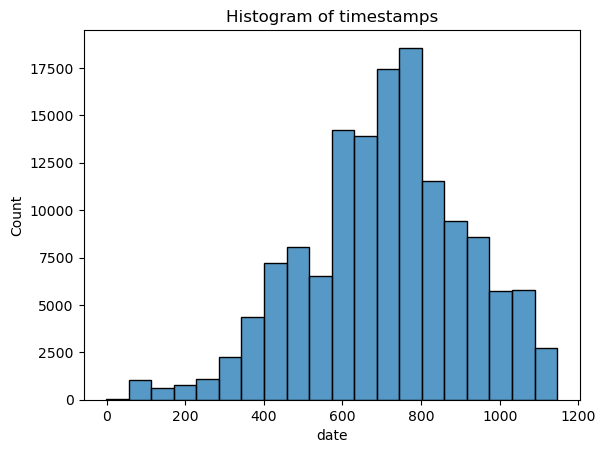

In [9]:
def days(d):
    return d.days

all_biases = covid_biases + [human_bias]
all_biases_pd = pd.DataFrame(all_biases)
covid_biases_pd = pd.DataFrame(covid_biases)
human_bias_pd = pd.DataFrame([human_bias])
# print(all_biases_pd.head())
# print(all_biases_pd.tail())

covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"]))
dates = covid_biases_pd["date"].apply(days)
covid_biases_pd.drop(columns=["date"], inplace=True)

pca = PCA(n_components=2)

pca.fit(all_biases_pd.drop(columns=["date"], inplace=False))

covid_biases_pd = pca.transform(covid_biases_pd)
human_bias_pd = pca.transform(human_bias_pd)

covid_biases_pd = pd.DataFrame(covid_biases_pd, columns=["pc0", "pc1"])
covid_biases_pd["date"] = dates
covid_biases_pd["type"] = "covid"

human_bias_pd = pd.DataFrame(human_bias_pd, columns=["pc0", "pc1"])
human_bias_pd["date"] = -1
human_bias_pd["type"] = "human"

all_biases_pd = pd.concat([covid_biases_pd, human_bias_pd])
print(all_biases_pd.tail())

all_biases_pd.reset_index(inplace=True)

sns.histplot(data=all_biases_pd, x="date", bins=20).set(title="Histogram of timestamps")

<class 'numpy.ndarray'>
        pc0  date   type
0  2.104709     0  human
1  2.104709     1  human
2  2.104709     2  human
3  2.104709     3  human
4  2.104709     4  human
9244
      index  date       pc0   type
2306   1195  1195  2.104709  human
2307   1196  1196  2.104709  human
2308   1197  1197  2.104709  human
2309   1198  1198  2.104709  human
2310   1199  1199  2.104709  human


<Axes: xlabel='date', ylabel='pc0'>

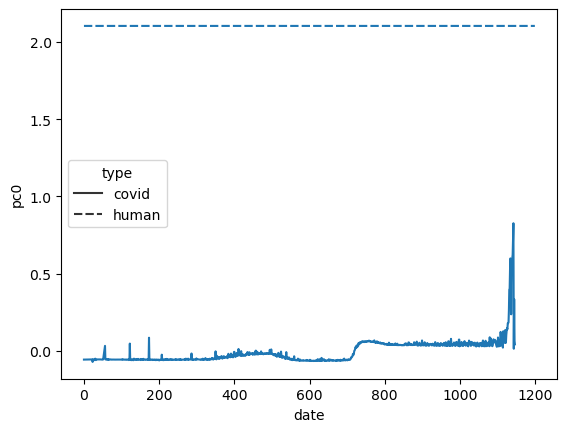

In [165]:
def days(d):
    return d.days

all_biases = covid_biases + [human_bias]
all_biases_pd = pd.DataFrame(all_biases)
covid_biases_pd = pd.DataFrame(covid_biases)
human_bias_pd = pd.DataFrame([human_bias])
# print(all_biases_pd.head())
# print(all_biases_pd.tail())

covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"]))
dates = covid_biases_pd["date"].apply(days)
covid_biases_pd.drop(columns=["date"], inplace=True)

pca = PCA(n_components=2)

pca.fit(all_biases_pd.drop(columns=["date"], inplace=False))

covid_biases_pd = pca.transform(covid_biases_pd)
human_bias_pd = pca.transform(human_bias_pd)

print(type(covid_biases_pd))

covid_biases_pd = pd.DataFrame(covid_biases_pd[:,0], columns=["pc0"])
covid_biases_pd["date"] = dates
covid_biases_pd = covid_biases_pd.groupby('date', as_index=False).mean()
covid_biases_pd["type"] = "covid"

human_bias_pd = pd.DataFrame(np.ones(1200) * human_bias_pd[0][0], columns=["pc0"])
human_bias_pd["date"] = range(0,1200)
human_bias_pd["type"] = "human"
print(human_bias_pd.head())

all_biases_pd = pd.concat([covid_biases_pd, human_bias_pd])
all_biases_pd.reset_index(inplace=True)

print(all_biases_pd.size)
print(all_biases_pd.tail())

sns.lineplot(data=all_biases_pd, x="date", y="pc0", style="type")

<class 'numpy.ndarray'>
        pc0  date   type
0  2.408112     0  human
1  2.408112     1  human
2  2.408112     2  human
3  2.408112     3  human
4  2.408112     4  human
564832
        index       pc0  date   type
141203   1195  2.408112  1195  human
141204   1196  2.408112  1196  human
141205   1197  2.408112  1197  human
141206   1198  2.408112  1198  human
141207   1199  2.408112  1199  human


[Text(0.5, 1.0, 'PCA 0 over time')]

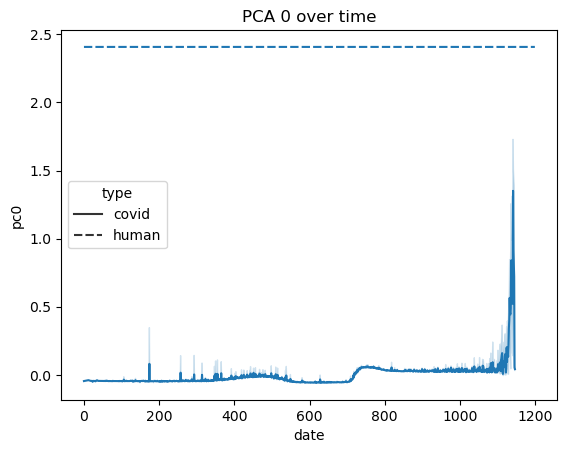

In [10]:
def days(d):
    return d.days

all_biases = covid_biases + [human_bias]
all_biases_pd = pd.DataFrame(all_biases)
covid_biases_pd = pd.DataFrame(covid_biases)
human_bias_pd = pd.DataFrame([human_bias])
# print(all_biases_pd.head())
# print(all_biases_pd.tail())

covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"]))
dates = covid_biases_pd["date"].apply(days)
covid_biases_pd.drop(columns=["date"], inplace=True)

pca = PCA(n_components=2)

pca.fit(all_biases_pd.drop(columns=["date"], inplace=False))

covid_biases_pd = pca.transform(covid_biases_pd)
human_bias_pd = pca.transform(human_bias_pd)

print(type(covid_biases_pd))

covid_biases_pd = pd.DataFrame(covid_biases_pd[:,0], columns=["pc0"])
covid_biases_pd["date"] = dates
covid_biases_pd["type"] = "covid"

human_bias_pd = pd.DataFrame(np.ones(1200) * human_bias_pd[0][0], columns=["pc0"])
human_bias_pd["date"] = range(0,1200)
human_bias_pd["type"] = "human"
print(human_bias_pd.head())

all_biases_pd = pd.concat([covid_biases_pd, human_bias_pd])
all_biases_pd.reset_index(inplace=True)

print(all_biases_pd.size)
print(all_biases_pd.tail())

sns.lineplot(data=all_biases_pd, x="date", y="pc0", style="type").set(title="PCA 0 over time")

<class 'numpy.ndarray'>
        pc0  date   type
0  2.408112     0  human
1  2.408112     1  human
2  2.408112     2  human
3  2.408112     3  human
4  2.408112     4  human
564832
        index       pc0  date   type
141203   1195  2.408112  1195  human
141204   1196  2.408112  1196  human
141205   1197  2.408112  1197  human
141206   1198  2.408112  1198  human
141207   1199  2.408112  1199  human


[Text(0.5, 1.0, 'PCA 0 over time scatterplot')]

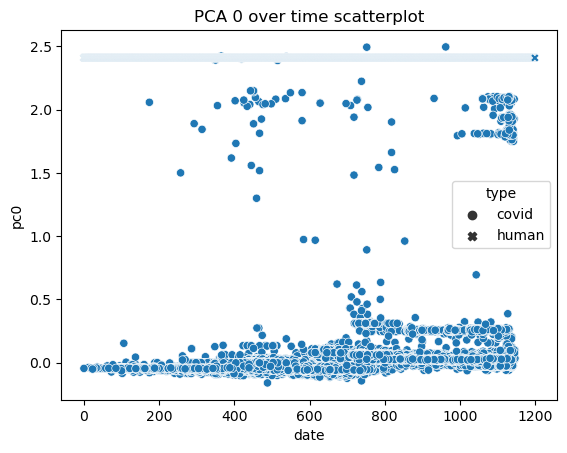

In [11]:
def days(d):
    return d.days

all_biases = covid_biases + [human_bias]
all_biases_pd = pd.DataFrame(all_biases)
covid_biases_pd = pd.DataFrame(covid_biases)
human_bias_pd = pd.DataFrame([human_bias])
# print(all_biases_pd.head())
# print(all_biases_pd.tail())

covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"]))
dates = covid_biases_pd["date"].apply(days)
covid_biases_pd.drop(columns=["date"], inplace=True)

pca = PCA(n_components=2)

pca.fit(all_biases_pd.drop(columns=["date"], inplace=False))

covid_biases_pd = pca.transform(covid_biases_pd)
human_bias_pd = pca.transform(human_bias_pd)

print(type(covid_biases_pd))

covid_biases_pd = pd.DataFrame(covid_biases_pd[:,0], columns=["pc0"])
covid_biases_pd["date"] = dates
covid_biases_pd["type"] = "covid"

human_bias_pd = pd.DataFrame(np.ones(1200) * human_bias_pd[0][0], columns=["pc0"])
human_bias_pd["date"] = range(0,1200)
human_bias_pd["type"] = "human"
print(human_bias_pd.head())

all_biases_pd = pd.concat([covid_biases_pd, human_bias_pd])
all_biases_pd.reset_index(inplace=True)

print(all_biases_pd.size)
print(all_biases_pd.tail())

sns.scatterplot(data=all_biases_pd, x="date", y="pc0", style="type").set(title="PCA 0 over time scatterplot")

In [5]:
unique = {}


for path in paths:
    all = []
    i = 0
    with open(path, "r") as handle:
        for seq_record in tqdm(SeqIO.parse(path, "fasta")):
            unique[seq_record.seq] = 1
    print(len(unique))

print(len(unique))

750709it [00:09, 78368.10it/s]


78093


725577it [00:09, 75418.32it/s]


136935


628270it [00:08, 74799.97it/s]


194432


614948it [00:08, 75465.69it/s]


257268


732090it [00:09, 75385.59it/s]


327993


643698it [00:08, 75765.44it/s]


387903


609836it [00:08, 74286.90it/s]


432918


504512it [00:06, 75595.55it/s]


471227


542315it [00:07, 73770.53it/s]


503149


638398it [00:08, 74950.09it/s]


540972


612798it [00:07, 77041.96it/s]


578470


680992it [00:09, 75454.09it/s]


629912


688620it [00:08, 77936.26it/s]


680562


707153it [00:09, 73019.96it/s]


749116


689719it [00:09, 72708.82it/s]

842202
842202
